In [1]:
# Initial imports
from datetime import datetime
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import model_from_json
from sklearn.metrics import mean_squared_error
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = Path("C:/Users/evere/Downloads/Inflation_data.csv")
data2 = Path("C:/Users/evere/Downloads/MBS_data.csv")
data3 = Path("C:/Users/evere/Downloads/FEDFUNDS.csv")
data4 = Path("C:/Users/evere/Downloads/alfredgraph.csv")
data5 = Path("C:/Users/evere/Downloads/UNRATE.csv")
data6 = Path('C:/Users/evere/Downloads/historicalweeklydata.csv')
data7 = Path('C:/Users/evere/Downloads/historicalweeklydata21.csv')
data8 = Path('C:/Users/evere/Downloads/sold_cust.csv')

In [3]:
df = pd.read_csv(data, header=None, index_col=0, parse_dates=True)
df2 = pd.read_csv(data2, header=None, index_col=0, parse_dates=True)
df3 = pd.read_csv(data3, header=None, index_col=0, parse_dates=True)
df4 = pd.read_csv(data4, header=None, index_col=0, parse_dates=True)
df5 = pd.read_csv(data5, header=None, index_col=0, parse_dates=True)
df6 = pd.read_csv(data6, header=6, index_col="Week", parse_dates=True )
df7 = pd.read_csv(data7, header=2, index_col="Week", parse_dates=True)
df8 = pd.read_csv(data8, header=4, index_col="Period", parse_dates=True)

In [4]:
df6.drop(columns=["points", "FRM.1", "points.1", "points.2", "spread", "margin", "Unnamed: 9"], inplace=True)
df6.tail()

,FRM,ARM
Week,,
2020-12-03,2.71,2.86
2020-12-10,2.71,2.79
2020-12-17,2.67,2.79
2020-12-24,2.66,2.79
2020-12-31,2.67,2.71


In [5]:
df6.dropna(inplace=True)
df6

,FRM,ARM
Week,,
2005-01-06,5.77,5.03
2005-01-13,5.74,5.05
2005-01-20,5.67,5.05
2005-01-27,5.66,5.02
2005-02-03,5.63,5.00
...,...,...
2020-12-03,2.71,2.86
2020-12-10,2.71,2.79
2020-12-17,2.67,2.79


In [6]:
df7.drop(columns=["points", "FRM.1", "points.1", "points.2", "spread", "margin", "Unnamed: 9"], inplace=True)
df7.tail()

,FRM,ARM
Week,,
NaT,NaN,NaN
NaT,NaN,NaN
NaT,NaN,NaN
NaT,NaN,NaN
NaT,NaN,NaN


In [7]:
df7.dropna(inplace=True)
df7

,FRM,ARM
Week,,
2021-01-07,2.65,2.75
2021-01-14,2.79,3.12
2021-01-21,2.77,2.80
2021-01-28,2.73,2.80
2021-02-04,2.73,2.78
2021-02-11,2.73,2.79
2021-02-18,2.81,2.77
2021-02-25,2.97,2.99
2021-03-04,3.02,2.73


In [8]:
df7.dtypes

FRM    float64
ARM    float64
dtype: object

In [9]:
df6 = df6.append(df7, sort=True)
df6

,ARM,FRM
Week,,
2005-01-06,5.03,5.77
2005-01-13,5.05,5.74
2005-01-20,5.05,5.67
2005-01-27,5.02,5.66
2005-02-03,5.00,5.63
...,...,...
2021-07-01,2.54,2.98
2021-07-08,2.52,2.90
2021-07-15,2.47,2.88


In [10]:
df6.dropna(inplace=True)
df6

,ARM,FRM
Week,,
2005-01-06,5.03,5.77
2005-01-13,5.05,5.74
2005-01-20,5.05,5.67
2005-01-27,5.02,5.66
2005-02-03,5.00,5.63
...,...,...
2021-07-01,2.54,2.98
2021-07-08,2.52,2.90
2021-07-15,2.47,2.88


<AxesSubplot:title={'center':'Adjustable Rates vs Fixed Rates'}, xlabel='Week'>

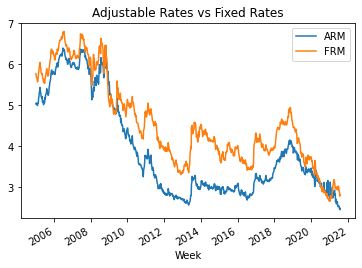

In [37]:
df6.plot(title='Adjustable Rates vs Fixed Rates')

In [11]:
new_df6 = df6.groupby(pd.Grouper(freq="M")).mean()

In [12]:
new_df6.reset_index(inplace=True)

In [13]:
new_df6["Week"] = new_df6["Week"].apply(lambda dt: dt.replace(day=1))

In [14]:
new_df6.set_index("Week", inplace=True)

In [15]:
new_df6

,ARM,FRM
Week,,
2005-01-01,5.0375,5.7100
2005-02-01,5.0225,5.6275
2005-03-01,5.2960,5.9280
2005-04-01,5.2650,5.8550
2005-05-01,5.1275,5.7200
...,...,...
2021-03-01,2.7825,3.0825
2021-04-01,2.8060,3.0600
2021-05-01,2.6175,2.9625


In [16]:
df8.drop(columns=['North', 'Mid-West', 'South', 'West', 'for sale', 'Supply2'], inplace=True)
df8.dropna(inplace=True)
df8.head()


,Implicit US
Period,
1997-01-01,88.2
1997-02-01,103.4
1997-03-01,117.0
1997-04-01,112.9
1997-05-01,112.1


In [17]:
combined_df = pd.concat(([df, df2, df3, df4, df8, df5, new_df6]), axis="columns", ignore_index=True, join="outer")
combined_df.dropna(inplace=True)
combined_df

,0,1,2,3,4,5,6,7
2005-01-01,190.7,45.4,2.28,19.33,91.8,5.3,5.0375,5.7100
2005-02-01,191.8,3.8,2.50,19.36,99.2,5.4,5.0225,5.6275
2005-03-01,193.3,4.7,2.63,19.4,114.8,5.2,5.2960,5.9280
2005-04-01,194.6,-2.8,2.79,19.45,110.5,5.2,5.2650,5.8550
2005-05-01,194.4,7.5,3.00,19.46,112.0,5.1,5.1275,5.7200
...,...,...,...,...,...,...,...,...
2021-02-01,263.014,25.4,0.08,30,102.1,6.2,2.8325,2.8100
2021-03-01,264.877,17.9,0.07,29.97,114.1,6.0,2.7825,3.0825
2021-04-01,267.054,13.8,0.07,30.17,111.6,6.1,2.8060,3.0600
2021-05-01,269.195,18.1,0.06,30.3,107.7,5.8,2.6175,2.9625


In [18]:
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [19]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)    

In [20]:
window_size = 50
feature_column = 7
target_column = 6
X, y = window_data(combined_df, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:10]} \n")
print (f"y sample values:\n{y[:10]}")

X sample values:
[[5.71   5.6275 5.928  5.855  5.72   5.582  5.695  5.82   5.774  6.065
  6.33   6.272  6.145  6.2525 6.324  6.5075 6.5975 6.682  6.7625 6.524
  6.4025 6.3575 6.24   6.135  6.2175 6.285  6.156  6.18   6.262  6.6575
  6.695  6.572  6.3825 6.375  6.208  6.095  5.758  5.9175 5.97   5.9175
  6.036  6.32   6.426  6.4775 6.0375 6.2    6.0875 5.286  5.0475 5.13  ]
 [5.6275 5.928  5.855  5.72   5.582  5.695  5.82   5.774  6.065  6.33
  6.272  6.145  6.2525 6.324  6.5075 6.5975 6.682  6.7625 6.524  6.4025
  6.3575 6.24   6.135  6.2175 6.285  6.156  6.18   6.262  6.6575 6.695
  6.572  6.3825 6.375  6.208  6.095  5.758  5.9175 5.97   5.9175 6.036
  6.32   6.426  6.4775 6.0375 6.2    6.0875 5.286  5.0475 5.13   5.0025]
 [5.928  5.855  5.72   5.582  5.695  5.82   5.774  6.065  6.33   6.272
  6.145  6.2525 6.324  6.5075 6.5975 6.682  6.7625 6.524  6.4025 6.3575
  6.24   6.135  6.2175 6.285  6.156  6.18   6.262  6.6575 6.695  6.572
  6.3825 6.375  6.208  6.095  5.758  5.9175 5.97   5.

In [21]:
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [22]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [23]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.69202634]
  [0.66788588]
  [0.75581565]
  [0.73445501]
  [0.69495245]
  [0.65457206]
  [0.68763716]
  [0.72421361]
  [0.71075347]
  [0.79590344]
  [0.8734455 ]
  [0.85647403]
  [0.81931236]
  [0.85076811]
  [0.87168983]
  [0.92538405]
  [0.95171909]
  [0.97644477]
  [1.        ]
  [0.94895522]
  [0.91268657]
  [0.89925373]
  [0.8641791 ]
  [0.83283582]
  [0.85746269]
  [0.87761194]
  [0.83910448]
  [0.84626866]
  [0.87074627]
  [0.98880597]
  [1.        ]
  [1.        ]
  [0.96967279]
  [0.96727853]
  [0.91396648]
  [0.87789306]
  [0.77313574]
  [0.82742681]
  [0.84690799]
  [0.83822042]
  [0.8753705 ]
  [0.95609756]
  [0.98586524]
  [1.        ]
  [0.95378271]
  [1.        ]
  [1.        ]
  [0.95102339]
  [0.86385234]
  [0.89400585]]

 [[0.66788588]
  [0.75581565]
  [0.73445501]
  [0.69495245]
  [0.65457206]
  [0.68763716]
  [0.72421361]
  [0.71075347]
  [0.79590344]
  [0.8734455 ]
  [0.85647403]
  [0.81931236]
  [0.85076811]
  [0.87168983]
  [0.92538405]


In [24]:
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [25]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 60
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [26]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [27]:
# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 60)            14880     
_________________________________________________________________
dropout (Dropout)            (None, 50, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6

In [28]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=90, verbose=1)

Epoch 1/10
2/2 [==============================] - 17s 78ms/step - loss: 0.1219
Epoch 2/10
2/2 [==============================] - 0s 106ms/step - loss: 0.0487
Epoch 3/10
2/2 [==============================] - 0s 115ms/step - loss: 0.0334
Epoch 4/10
2/2 [==============================] - 0s 97ms/step - loss: 0.0408
Epoch 5/10
2/2 [==============================] - 0s 115ms/step - loss: 0.0291
Epoch 6/10
2/2 [==============================] - 0s 107ms/step - loss: 0.0323
Epoch 7/10
2/2 [==============================] - 0s 111ms/step - loss: 0.0297
Epoch 8/10
2/2 [==============================] - 0s 119ms/step - loss: 0.0280
Epoch 9/10
2/2 [==============================] - 0s 132ms/step - loss: 0.0235
Epoch 10/10
2/2 [==============================] - 0s 113ms/step - loss: 0.0248


In [29]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.021306147798895836

In [30]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [31]:
# Recover the original prices instead of the scaled version
predicted_rates = scaler.inverse_transform(predicted)
real_rates = scaler.inverse_transform(y_test.reshape(-1, 1))

In [32]:
# Create a DataFrame of Real and Predicted values
adjustable_rates = pd.DataFrame({
    "Actual": real_rates.ravel(),
    "Predicted": predicted_rates.ravel()
}, index = combined_df.index[-len(real_rates): ]) 

# Show the DataFrame's head
adjustable_rates

,Actual,Predicted
2017-10-01,3.1800,3.143913
2017-11-01,3.2400,3.150645
2017-12-01,3.3925,3.157497
2018-01-01,3.4725,3.164633
2018-02-01,3.5950,3.171535
2018-03-01,3.6520,3.180068
2018-04-01,3.6600,3.191139
2018-05-01,3.7900,3.204611
2018-06-01,3.8175,3.219663
2018-07-01,3.8350,3.236365
